# **Business Objective** :  Extracting sentiment from customer reviews on a product

# Import Libraries

In [7]:
!pip install nltk


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
import re
import nltk
nltk.download('punkt')
from nltk import punkt
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from textblob import TextBlob


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Import Data

In [9]:
reviews_df = pd.read_csv('reviews.csv')

reviews_df.head()

,headline,reviewBody,ratingValue
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0


# Data Exploration

In [10]:
print(f"Dataset/DataFrame Shape : {reviews_df.shape}")

Dataset/DataFrame Shape : (325, 3)


In [11]:
print(f"feature names : {reviews_df.columns.values}")

feature names : ['headline' 'reviewBody' 'ratingValue']


In [12]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   headline     325 non-null    object 
 1   reviewBody   325 non-null    object 
 2   ratingValue  319 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.7+ KB


In [13]:
reviews_df.describe()

,ratingValue
count,319.00000
mean,4.37931
std,1.08608
min,1.00000
25%,4.00000
50%,5.00000
75%,5.00000
max,5.00000


In [14]:
reviews_df.isnull().sum()

headline       0
reviewBody     0
ratingValue    6
dtype: int64

In [15]:
reviews_df[reviews_df['ratingValue'].isna() == True]

,headline,reviewBody,ratingValue
319,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN
320,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN
321,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN
322,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN
323,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN
324,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN


In [16]:
reviews_df[reviews_df.duplicated()]

,headline,reviewBody,ratingValue
305,Great Device,"Great device, the 32GB of RAM makes a big diff...",5.0
306,Great Laptop,"Been a Dell user for over 20 years, and their ...",5.0
307,Great Device,"Great device, the 32GB of RAM makes a big diff...",5.0
308,Great Laptop,"Been a Dell user for over 20 years, and their ...",5.0
309,Great Device,"Great device, the 32GB of RAM makes a big diff...",5.0
310,Great Laptop,"Been a Dell user for over 20 years, and their ...",5.0
311,Great Device,"Great device, the 32GB of RAM makes a big diff...",5.0
312,Great Laptop,"Been a Dell user for over 20 years, and their ...",5.0
313,Great Device,"Great device, the 32GB of RAM makes a big diff...",5.0
314,Great Laptop,"Been a Dell user for over 20 years, and their ...",5.0


# Data Cleaning

In [17]:
#Removing Duplicates
reviews_df.drop_duplicates(inplace=True)

In [18]:
reviews_df[reviews_df.duplicated()]

,headline,reviewBody,ratingValue


In [19]:
reviews_df.shape

(306, 3)

In [20]:
reviews_df.isnull().sum()

headline       0
reviewBody     0
ratingValue    1
dtype: int64

In [21]:
# Removing Missing Values
reviews_df.dropna(subset=['ratingValue'],inplace=True)

In [22]:
reviews_df.head(5)

,headline,reviewBody,ratingValue
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0


In [23]:
reviews_df.shape

(305, 3)

In [24]:
# adding a sentiment column to classify reviews as Positive, Negative or Neutral
# Positive = 1
# Negative = -1
# Neutral = 0

reviews_df['sentiment'] = np.where(reviews_df['ratingValue']>= 4.0,1,
                             np.where(reviews_df['ratingValue']==3.0,0,-1))
reviews_df['sentiment'].unique()

array([ 1,  0, -1])

# Text Preprocessing

In [25]:
# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply preprocessing to reviewBody
reviews_df['cleaned_reviewBody'] = reviews_df['reviewBody'].apply(preprocess_text)
reviews_df['cleaned_headline'] = reviews_df['headline'].apply(preprocess_text)
reviews_df['combined_review'] = reviews_df['cleaned_headline'].astype(str) + " " + reviews_df['cleaned_reviewBody'].astype(str)

reviews_df.head()


,headline,reviewBody,ratingValue,sentiment,cleaned_reviewBody,cleaned_headline,combined_review
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,1,super light efficient laptop crisp clean scree...,super light efficient laptop,super light efficient laptop super light effic...
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,1,far loving new look feel new laptop,new laptop great,new laptop great far loving new look feel new ...
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,1,great build quality excellent screen good port...,lightweight powerhouse,lightweight powerhouse great build quality exc...
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,1,excellent laptop work processor able handle wo...,great laptop work,great laptop work excellent laptop work proces...
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,1,far good like hdmi usbc ports instead usbc por...,practical solid laptop,practical solid laptop far good like hdmi usbc...


In [26]:
reviews_df.drop(['headline','reviewBody','cleaned_reviewBody',
'cleaned_headline'],axis=1,inplace=True)
reviews_df.head()

,ratingValue,sentiment,combined_review
0,5.0,1,super light efficient laptop super light effic...
1,5.0,1,new laptop great far loving new look feel new ...
2,5.0,1,lightweight powerhouse great build quality exc...
3,5.0,1,great laptop work excellent laptop work proces...
4,5.0,1,practical solid laptop far good like hdmi usbc...


In [27]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 304
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ratingValue      305 non-null    float64
 1   sentiment        305 non-null    int32  
 2   combined_review  305 non-null    object 
dtypes: float64(1), int32(1), object(1)
memory usage: 8.3+ KB


# Text Data Analysis

In [28]:
reviews_df# Function to analyze sentiment using TextBlob
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis
reviews_df['polarity'] = reviews_df['combined_review'].apply(analyze_sentiment_textblob)

# Display the first few rows with sentiment scores
print(f"Reviews : {reviews_df.head()}")
reviews_df['polarity'].unique()

Reviews :    ratingValue  sentiment                                    combined_review  \
0          5.0          1  super light efficient laptop super light effic...   
1          5.0          1  new laptop great far loving new look feel new ...   
2          5.0          1  lightweight powerhouse great build quality exc...   
3          5.0          1  great laptop work excellent laptop work proces...   
4          5.0          1  practical solid laptop far good like hdmi usbc...   

   polarity  
0  0.326190  
1  0.318182  
2  0.600000  
3  0.560000  
4  0.362500  


array([ 0.32619048,  0.31818182,  0.6       ,  0.56      ,  0.3625    ,
        0.55      ,  0.26666667,  0.68939394,  0.25952381,  0.41866667,
        0.41111111,  0.45      ,  0.35714286,  0.432     ,  0.50666667,
        0.5       ,  0.46666667,  0.06065341,  0.58333333,  0.86666667,
        1.        ,  0.36      ,  0.8       ,  0.45      ,  0.46      ,
        0.28333333,  0.        ,  0.13636364,  0.2875    ,  0.525     ,
        0.4       ,  0.43333333,  0.35      ,  0.36704545,  0.66      ,
        0.6       ,  0.3       ,  0.36944444, -0.025     ,  0.65      ,
        0.8       ,  0.21666667,  0.21666667,  0.29916667,  0.18151848,
        0.49545455,  0.24060606,  0.31875   ,  0.23072391,  0.45785124,
        0.42222222, -0.05      ,  0.20625   , -0.14791667,  0.38888889,
        0.25833333,  0.53333333,  0.48666667,  0.40666667,  0.04166667,
        0.08541667,  0.675     ,  0.85      ,  0.15833333,  0.7       ,
        0.625     ,  0.53333333,  0.34      ,  0.43129252,  0.56

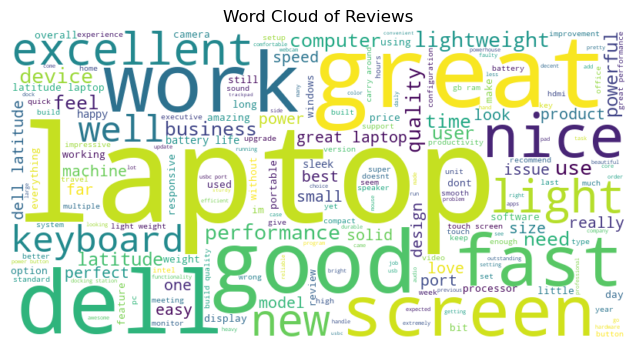

In [29]:
all_reviews = ' '.join(reviews_df['combined_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

# Data Visualization

### Analyzing the reviews' length

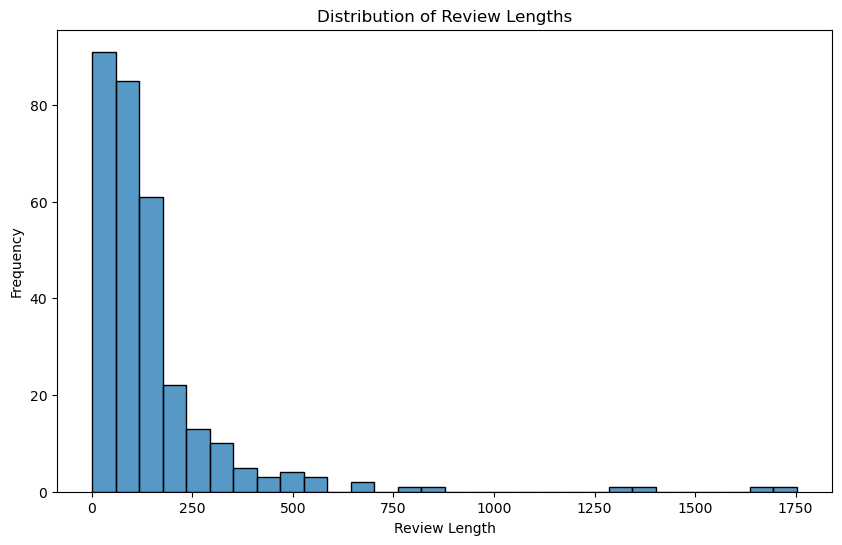

In [30]:
reviews_df['review_length'] = reviews_df['combined_review'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(reviews_df['review_length'], bins=30)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

## From the graph above we can understand that 'most of the reviews are written less than 500 charecters'

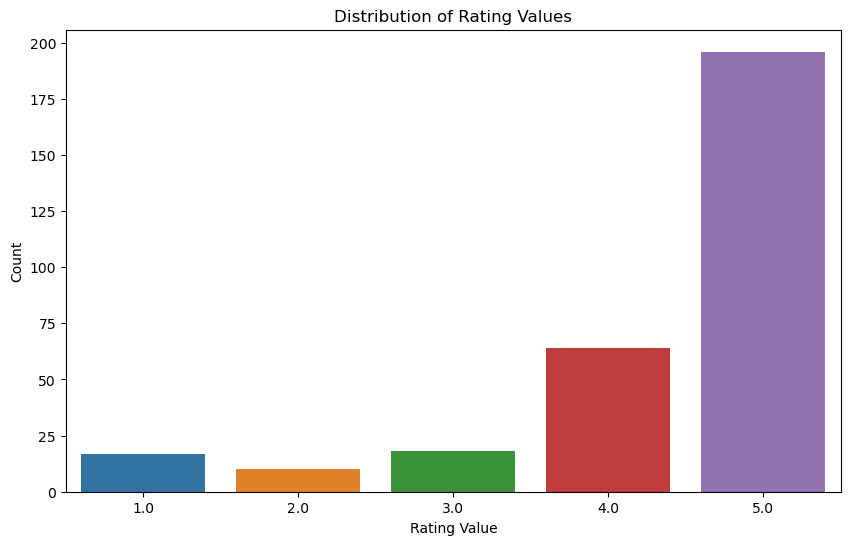

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data = reviews_df, x='ratingValue')
plt.title('Distribution of Rating Values')
plt.xlabel('Rating Value')
plt.ylabel('Count')
plt.show()

## From the graph above, we can understand that 'most of the reviews are 5.0'

## Pie Chart for rating values

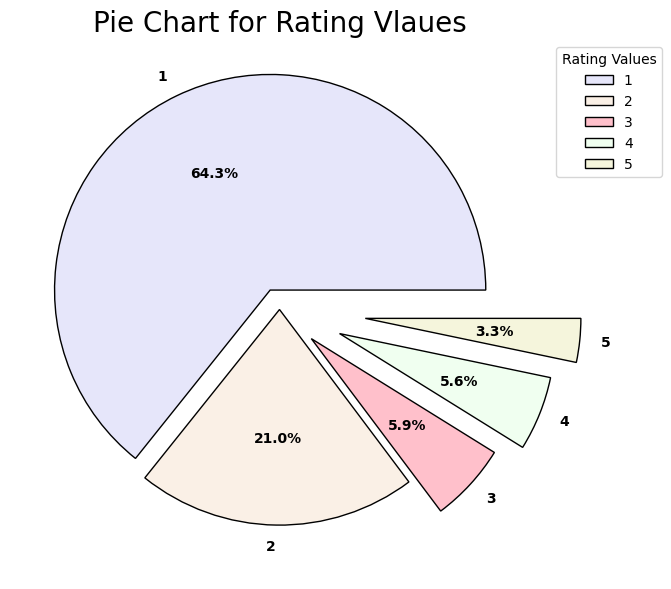

In [32]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)


plt.figure(figsize=(7,7))
wp = {'linewidth':1, 'edgecolor':'black'}

e = (0.1, 0.0, 0.2, 0.3, 0.4)

colors = ['lavender','linen','pink','honeydew','beige']

tags = reviews_df['ratingValue'].value_counts()/reviews_df.shape[0]

plt.pie(tags,labels=[1,2,3,4,5],
        colors=colors,
        explode=e,
        wedgeprops=wp,
        textprops=dict(weight='bold'),
        autopct=lambda pct: func(pct, tags))


plt.legend(title='Rating Values',loc='upper left',bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Pie Chart for Rating Vlaues',fontsize=20)

plt.show()

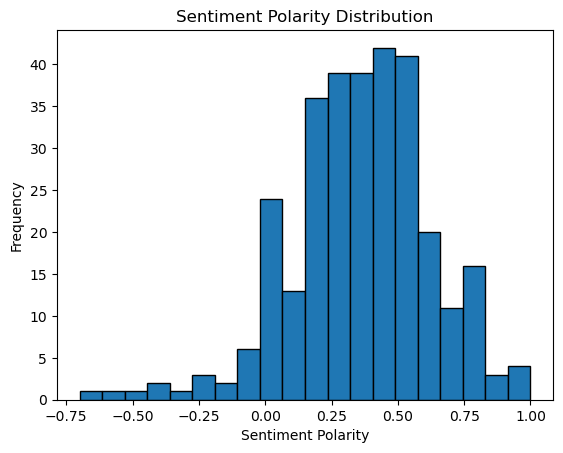

count    305.000000
mean       0.357428
std        0.265075
min       -0.700000
25%        0.200000
50%        0.369048
75%        0.525000
max        1.000000
Name: polarity, dtype: float64


In [33]:
# Plot histogram of sentiment polarity
plt.hist(reviews_df['polarity'], bins=20, edgecolor='black')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print(reviews_df['polarity'].describe())

In [34]:
correlation_matrix = reviews_df[['ratingValue','polarity','sentiment','review_length']].corr()
correlation_matrix

,ratingValue,polarity,sentiment,review_length
ratingValue,1.000000,0.478163,0.923155,0.031881
polarity,0.478163,1.000000,0.457685,-0.109695
sentiment,0.923155,0.457685,1.000000,0.045245
review_length,0.031881,-0.109695,0.045245,1.000000


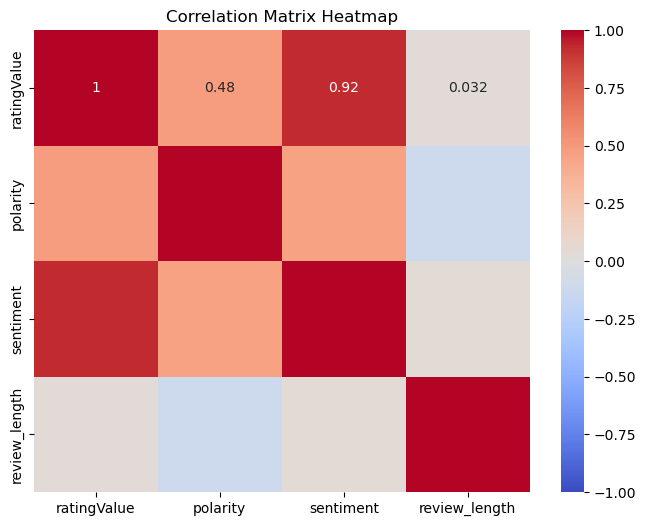

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Displaying Outliers

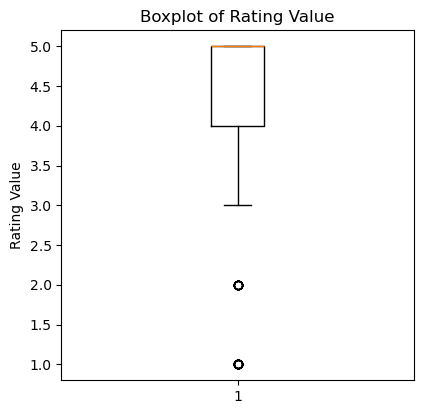

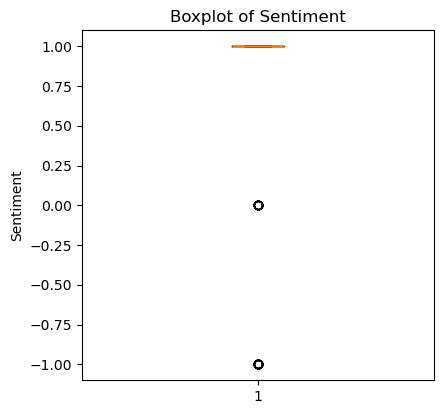

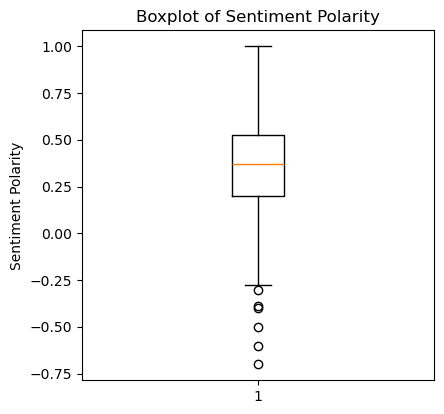

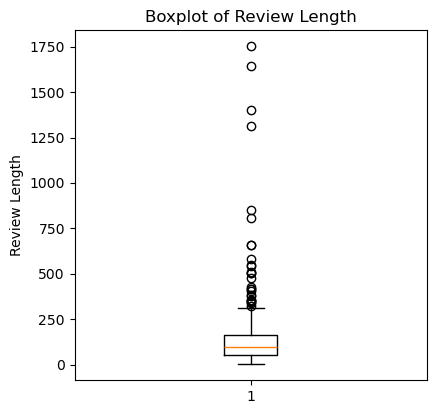

In [36]:
for i in range(len(reviews_df.columns)):


    if reviews_df.columns[i] == 'ratingValue':
        plt.figure(figsize=(10,10))
        plt.subplot(2,2,1)
        plt.boxplot(data=reviews_df,x='ratingValue',vert=True)
        plt.title('Boxplot of Rating Value')
        plt.ylabel('Rating Value')
        plt.show()



    elif reviews_df.columns[i] == 'sentiment':
        plt.figure(figsize=(10,10))
        plt.subplot(2,2,2)
        plt.boxplot(data=reviews_df,x='sentiment',vert=True)
        plt.title('Boxplot of Sentiment')
        plt.ylabel('Sentiment')
        plt.show()



    elif reviews_df.columns[i] == 'polarity':
        plt.figure(figsize=(10,10))
        plt.subplot(2,2,3)
        plt.boxplot(data=reviews_df,x='polarity',vert=True)
        plt.title('Boxplot of Sentiment Polarity')
        plt.ylabel('Sentiment Polarity')
        plt.show()


    elif reviews_df.columns[i] == 'review_length':
        plt.figure(figsize=(10,10))
        plt.subplot(2,2,4)
        plt.boxplot(data=reviews_df,x='review_length',vert=True)
        plt.title('Boxplot of Review Length')
        plt.ylabel('Review Length')
        plt.show()

    else:
        continue

#Considering an example for ratingValue column

## Calculating Inter-Quantile Range for ratingValue column and removing outliers

In [37]:
# Calculate IQR for ratingValue
Q1 = reviews_df['ratingValue'].quantile(0.25)
Q3 = reviews_df['ratingValue'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (reviews_df['ratingValue'] < lower_bound) | (reviews_df['ratingValue'] > upper_bound)

# Filter reviews without outliers
filtered_reviews = reviews_df[~outliers]

### Creating a Box-Plot for ratingValue without Outliers

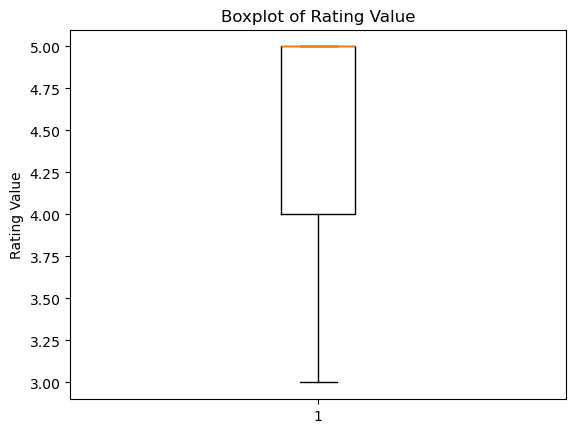

In [38]:
plt.boxplot(filtered_reviews['ratingValue'], vert=True)
plt.title('Boxplot of Rating Value')
plt.ylabel('Rating Value')
plt.show()

## Analyzing the Sentiment without removing the outliers

count    305.000000
mean       0.357428
std        0.265075
min       -0.700000
25%        0.200000
50%        0.369048
75%        0.525000
max        1.000000
Name: polarity, dtype: float64


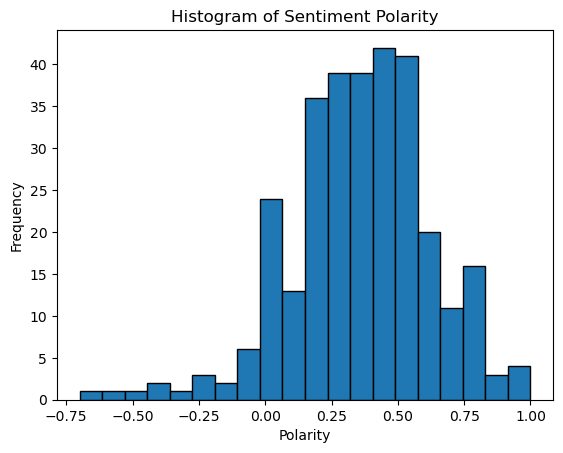

In [39]:
# Display descriptive statistics of polarity
print(reviews_df['polarity'].describe())

# Plot histogram of sentiment polarity
plt.hist(reviews_df['polarity'], bins=20, edgecolor='black')
plt.title('Histogram of Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

Conclusion - By performing sentiment analysis without removing outliers shows us that we have a full range of sentiments expressed in the reviews. We must not remove outliers if they significantly skew the analysis results.

## Calculating Outlier Percentage

In [40]:
def outlier_percentage(df):
    for i in range(len(df.columns)):
        if df.columns[i]=='combined_review':
            continue
        else:
            q1 = df[df.columns[i]].quantile(0.25)
            q3 = df[df.columns[i]].quantile(0.75)
            iqr = q3 - q1

            upper = q3+(iqr*1.5)
            lower = q1-(iqr*1.5)


            percentage = (((len(df[df[df.columns[i]] > upper ])) +
                          (len(df[df[df.columns[i]] < lower]))) /
                         len(df[df.columns[i]])) * 100
            print(str(df.columns[i]) + ':'+str(percentage)+'%')
outlier_percentage(reviews_df)

ratingValue:8.852459016393443%
sentiment:14.754098360655737%
polarity:1.9672131147540985%
review_length:8.852459016393443%


# Most Frequent Words

In [41]:
# Split each text into words and create a Counter object
word_counts = Counter()
for text in reviews_df.combined_review.str.split():
    word_counts.update(text)

# Get the most common words (default: top 10)
most_common = pd.DataFrame(word_counts.most_common(10),columns=['words','frequency'])

print(most_common)

         words  frequency
0       laptop        253
1        great        151
2         dell        110
3         good         84
4     latitude         78
5       screen         70
6        light         61
7         work         56
8         fast         54
9  performance         54


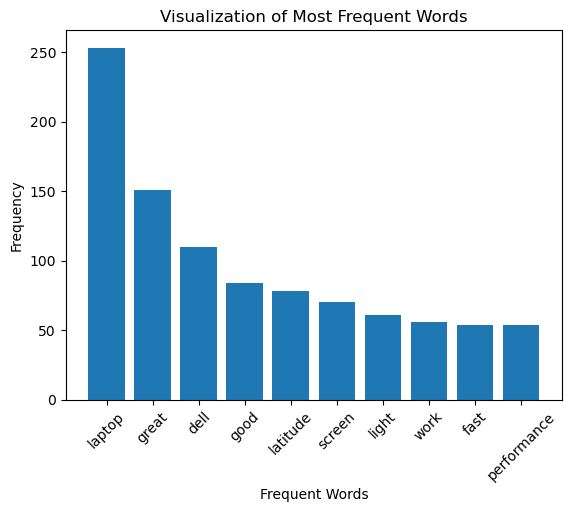

In [42]:
plt.bar(most_common['words'],most_common['frequency'])
plt.xlabel('Frequent Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Visualization of Most Frequent Words')
plt.show()

In [43]:
reviews_df.head()

,ratingValue,sentiment,combined_review,polarity,review_length
0,5.0,1,super light efficient laptop super light effic...,0.326190,119
1,5.0,1,new laptop great far loving new look feel new ...,0.318182,52
2,5.0,1,lightweight powerhouse great build quality exc...,0.600000,199
3,5.0,1,great laptop work excellent laptop work proces...,0.560000,92
4,5.0,1,practical solid laptop far good like hdmi usbc...,0.362500,186


### Re-arrange the columns in dataset to create arrays required for model building

In [44]:
reviews_df = reviews_df.iloc[:, [2, 3, 0, 4, 1]]
reviews_df.head()

,combined_review,polarity,ratingValue,review_length,sentiment
0,super light efficient laptop super light effic...,0.326190,5.0,119,1
1,new laptop great far loving new look feel new ...,0.318182,5.0,52,1
2,lightweight powerhouse great build quality exc...,0.600000,5.0,199,1
3,great laptop work excellent laptop work proces...,0.560000,5.0,92,1
4,practical solid laptop far good like hdmi usbc...,0.362500,5.0,186,1


In [45]:
# the reviews that contain negative sentiments
reviews_df[reviews_df['sentiment']== -1]

,combined_review,polarity,ratingValue,review_length,sentiment
278,lightweight powerful play nicely multiple moni...,0.240000,2.0,123,-1
279,evo framework purchased laptop personal use we...,0.231944,2.0,661,-1
280,device faulty facing issues usage device fault...,0.000000,2.0,119,-1
281,waste money worst screen quality ever laptop,-0.600000,2.0,44,-1
282,dell latitudeinlaptop significant downgrade ma...,0.120265,2.0,148,-1
283,slow waited weeks computer way slow,-0.300000,2.0,35,-1
284,solid corporate device great performing device...,0.200000,2.0,62,-1
285,many complications received new dell came many...,-0.072727,2.0,256,-1
286,dead arrival good luck far failing usbc ports ...,0.200000,2.0,67,-1
287,good device poor screen touch support device f...,-0.082803,2.0,293,-1


In [46]:
# the reviews having neutral sentiments
reviews_df[reviews_df['sentiment']== 0]

,combined_review,polarity,ratingValue,review_length,sentiment
260,good last dell purchase less happy individual ...,0.266667,3.0,78,0
261,user friendly user friendly love,0.416667,3.0,32,0
262,needs memory function like workstation pc came...,0.311111,3.0,136,0
263,work happy latitude also doking station thunde...,0.800000,3.0,65,0
264,great laptop great choice laptop upgrade offic...,0.800000,3.0,52,0
265,want quit standby mode computer works well exc...,0.394949,3.0,155,0
266,fine dependable machine,0.416667,3.0,23,0
267,dell latitude xcto little flimsy less ports sc...,0.045387,3.0,94,0
268,potential exec laptop replacement laptop light...,0.245000,3.0,356,0
269,portable vs traditional device slim portable e...,0.332143,3.0,185,0


In [47]:
# Total number of negative sentiments
reviews_df[reviews_df['sentiment']== -1].shape[0]

27

In [48]:
# total number of positive sentiment
reviews_df[reviews_df['sentiment']== 1].shape[0]

260

In [49]:
# total number of neutral sentiment
reviews_df[reviews_df['sentiment']== 0].shape[0]

18

In [50]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 304
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   combined_review  305 non-null    object 
 1   polarity         305 non-null    float64
 2   ratingValue      305 non-null    float64
 3   review_length    305 non-null    int64  
 4   sentiment        305 non-null    int32  
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 13.1+ KB


# **MODEL BUILDING**

### Split the dataset into features (X) and target variable (y)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

In [52]:
X_col = reviews_df.drop('sentiment', axis=1)
Y_col = reviews_df['sentiment']
X_col,Y_col

(                                       combined_review  polarity  ratingValue  \
 0    super light efficient laptop super light effic...  0.326190          5.0   
 1    new laptop great far loving new look feel new ...  0.318182          5.0   
 2    lightweight powerhouse great build quality exc...  0.600000          5.0   
 3    great laptop work excellent laptop work proces...  0.560000          5.0   
 4    practical solid laptop far good like hdmi usbc...  0.362500          5.0   
 ..                                                 ...       ...          ...   
 300  faulty motherboard dell sent laptop faulty mot...  0.000000          1.0   
 301  dead arrival laptop dead arrival still waiting... -0.200000          1.0   
 302  bad quality bad quality overheating keyboardtr... -0.700000          1.0   
 303  hassles installation win laptop come required ...  0.800000          1.0   
 304  broken device laptop broken customer support h... -0.400000          1.0   
 
      review_l

## Creating the array of columns as required for model building.

In [53]:
array = reviews_df.values
X = array[:, 0:-1]
Y = array[:, -1]

In [54]:
pd.DataFrame(Y)

,0
0,1
1,1
2,1
3,1
4,1
...,...
300,-1
301,-1
302,-1
303,-1


In [55]:
pd.DataFrame(X)

,0,1,2,3
0,super light efficient laptop super light effic...,0.32619,5.0,119
1,new laptop great far loving new look feel new ...,0.318182,5.0,52
2,lightweight powerhouse great build quality exc...,0.6,5.0,199
3,great laptop work excellent laptop work proces...,0.56,5.0,92
4,practical solid laptop far good like hdmi usbc...,0.3625,5.0,186
...,...,...,...,...
300,faulty motherboard dell sent laptop faulty mot...,0.0,1.0,54
301,dead arrival laptop dead arrival still waiting...,-0.2,1.0,58
302,bad quality bad quality overheating keyboardtr...,-0.7,1.0,59
303,hassles installation win laptop come required ...,0.8,1.0,80


## Data Splitting

In [56]:
from sklearn.model_selection import train_test_split

### Splitting the data into training and test data-subsets

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")
# where sentiment column is our target variable-column in our combined_review dataset

X train: (213, 4)
y train: (213,)
X test: (92, 4)
y test: (92,)


In [58]:
X_train,X_test,y_train,y_test

(array([['best computer gorgeous graphics color speed', 0.85, 5.0, 43],
        ['great business laptop delivers sleek laptop beautiful dark graysilver finish runs superfast got configured gb ram camera quality good much better laptops years ago exceptional excellent sound quality fourspeaker setup bit heavy tablet mode depends laptops chassis pick worthwhile upgrade coming anything',
         0.5066666666666667, 5.0, 303],
        ['amazing laptop laptop amazing lightweight powerful easy carry around feels sturdy touchpad keyboard responsive highly recommended',
         0.41866666666666674, 5.0, 129],
        ['awesome laptop easy issue full charging gives long time durability',
         0.4333333333333333, 5.0, 66],
        ['great fit works exactly expected', 0.3666666666666667, 4.0, 32],
        ['laptops use x laptops throughout office issues seem cleared latest model',
         0.5, 5.0, 72],
        ['lightweight champion fantastic laptop nice light super powerful price',
     

In [59]:
y_train.dtype

dtype('O')

## Text Vectorization

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Vectorize text data using TF-IDF

In [61]:
text_data_train = X_train[:, 0]
text_data_test = X_test[:, 0]

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(text_data_train)
X_test_vec = vectorizer.transform(text_data_test)

In [62]:
X_train_vec,X_test_vec

(<213x1515 sparse matrix of type '<class 'numpy.float64'>'
 	with 4141 stored elements in Compressed Sparse Row format>,
 <92x1515 sparse matrix of type '<class 'numpy.float64'>'
 	with 1246 stored elements in Compressed Sparse Row format>)

In [63]:
X_train_vec.shape,X_test_vec.shape

((213, 1515), (92, 1515))

In [64]:
print(f"X train max value: {X_train_vec.max()}")
print(f"X test max value: {X_test_vec.max()}")
print(f"X train min value: {X_train_vec.min()}")
print(f"X test min value: {X_test_vec.min()}")

X train max value: 0.8484267296393951
X test max value: 0.867740918959493
X train min value: 0.0
X test min value: 0.0


In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train, y_test
# where -1 => 0
    # 0 => 1
    # 1 => 2

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2,
        2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
        2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
        2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1,
        2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2,
        0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
        2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2

In [66]:
y_train.dtype,y_test.dtype

(dtype('int32'), dtype('int32'))

In [67]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

## 1. Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

### Train a logistic regression model

In [69]:
log_reg = LogisticRegression(max_iter = 1000)
# apply the model

log_reg.fit(X_train_vec, y_train)
# fit the model on training and testing data

y_pred_log_reg = log_reg.predict(X_test_vec)
# prediction on testing data

log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
# finding the accuracy score

log_reg_report = classification_report(y_test, y_pred_log_reg)
# state the classification report

In [70]:
y_pred_log_reg
print(f"Accuracy: {log_reg_acc}")
print("Classification Report:\n", log_reg_report)

Accuracy: 0.8913043478260869
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         2
           2       0.89      1.00      0.94        82

    accuracy                           0.89        92
   macro avg       0.30      0.33      0.31        92
weighted avg       0.79      0.89      0.84        92



### Hyperparameter Tuning

In [71]:
# Define hyperparameter grid
lr_param_grid = {
    'C' : [0.001, 0.01, 0.1, 1, 10],
    'penalty' : ['l1', 'l2'],
    'solver': ['lbfgs','newton-cg','liblinear'],
    'random_state': [42],
    'max_iter' : [1000]
}

In [72]:
# Create GridSearchCV Object
lr_grid_search = GridSearchCV(log_reg, lr_param_grid, cv = 5, scoring = 'accuracy')

# Fit the grid search
lr_grid_search.fit(X_train_vec, y_train)

# Get the best model and parameters
best_log_reg = lr_grid_search.best_estimator_
best_params_log_reg = lr_grid_search.best_params_

# Print the best model and parameters
print("Best Logistic Regression Model:", best_log_reg)
print("Best Logistic Regression Parameters:", best_params_log_reg)


Best Logistic Regression Model: LogisticRegression(C=10, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')
Best Logistic Regression Parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}


In [73]:
params = best_log_reg.get_params()

# Print the parameters
for param, value in params.items():
    print(f"{param}: {value}")

C: 10
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 1000
multi_class: auto
n_jobs: None
penalty: l1
random_state: 42
solver: liblinear
tol: 0.0001
verbose: 0
warm_start: False


#### using the best logistic regression model with best parameters.

In [74]:
best_log_reg.fit(X_train_vec, y_train)
# fit the model on training and testing data

y_pred_best_log_reg = best_log_reg.predict(X_test_vec)
# prediction on testing data

best_log_reg_acc = accuracy_score(y_test, y_pred_best_log_reg)
# finding the accuracy score

best_log_reg_report = classification_report(y_test, y_pred_best_log_reg)
# state the classification report

y_pred_best_log_reg
print(f"Accuracy: {best_log_reg_acc}")
print("Classification Report:\n", best_log_reg_report)

Accuracy: 0.8695652173913043
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.12      0.17         8
           1       0.00      0.00      0.00         2
           2       0.92      0.96      0.94        82

    accuracy                           0.87        92
   macro avg       0.39      0.36      0.37        92
weighted avg       0.84      0.87      0.85        92



## 2. Support Vector Machine (SVM)

In [75]:
from sklearn.svm import SVC

### Train an SVM model

In [76]:
svm = SVC()
# apply the model

svm.fit(X_train_vec, y_train)
# fit the model on training and testing data

y_pred_svm = svm.predict(X_test_vec)
# prediction on testing data

svm_acc = accuracy_score(y_test, y_pred_svm)
# finding the accuracy score

svm_report = classification_report(y_test, y_pred_svm)
# state the classification report

In [77]:
y_pred_svm,
print(f"Accuracy: {svm_acc}")
print("Classification Report:\n", svm_report)

Accuracy: 0.8913043478260869
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         2
           2       0.89      1.00      0.94        82

    accuracy                           0.89        92
   macro avg       0.30      0.33      0.31        92
weighted avg       0.79      0.89      0.84        92



### Hyperparameter Tuning

In [78]:
# Define Hyperparameter Grid
svm_param_grid = {
    'kernel' :['rbf','linear','poly'],
    'C': [0.001,0.01,0.1, 1, 10, 100],
    'gamma':[0.001,0.01,0.1, 1, 10, 100],
    'random_state': [42]
}


In [79]:
# Create GridSearchCV object
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=5, scoring='accuracy')

# Fit the SVM Grid Search
svm_grid_search.fit(X_train_vec, y_train)

# Get the best model and parameters
best_svm = svm_grid_search.best_estimator_
best_params_svm = svm_grid_search.best_params_

# Print the best SVM model and best parameters
print("Best SVM Model:", best_svm)
print("BEst SVM Parameters:", best_params_svm)

Best SVM Model: SVC(C=10, gamma=0.001, kernel='linear', random_state=42)
BEst SVM Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'linear', 'random_state': 42}


In [80]:
params = best_svm.get_params()

# Print the parameters
for param, value in params.items():
    print(f"{param}: {value}")

C: 10
break_ties: False
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: ovr
degree: 3
gamma: 0.001
kernel: linear
max_iter: -1
probability: False
random_state: 42
shrinking: True
tol: 0.001
verbose: False


### using the best SVM model with best parameters

In [81]:
best_svm.fit(X_train_vec, y_train)
# fit the model on training and testing data

y_pred_best_svm = best_svm.predict(X_test_vec)
# prediction on testing data

best_svm_acc = accuracy_score(y_test, y_pred_best_svm)
# finding the accuracy score

best_svm_report = classification_report(y_test, y_pred_best_svm)
# state the classification report

y_pred_svm,
print(f"Accuracy: {best_svm_acc}")
print("Classification Report:\n", best_svm_report)

Accuracy: 0.8913043478260869
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.00      0.00      0.00         2
           2       0.90      0.99      0.94        82

    accuracy                           0.89        92
   macro avg       0.63      0.37      0.39        92
weighted avg       0.89      0.89      0.86        92



## 3. Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

### Train a Random Forest Model

In [83]:
rf = RandomForestClassifier(random_state = 42)
# apply the model

rf.fit(X_train_vec, y_train)
# fit the model on training and testing data
y_pred_rf = rf.predict(X_test_vec)
# prediction on testing data

rf_acc = accuracy_score(y_test, y_pred_rf)
# finding the accuracy score

rf_report = classification_report(y_test, y_pred_rf)
# state the classification report

In [84]:
y_pred_rf,
print(f"Accuracy: {rf_acc}")
print("Classification Report:\n", rf_report)

Accuracy: 0.8913043478260869
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         2
           2       0.89      1.00      0.94        82

    accuracy                           0.89        92
   macro avg       0.30      0.33      0.31        92
weighted avg       0.79      0.89      0.84        92



### Hyperparameter Tuning

In [85]:
# Define Hyperparameter Grid
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [86]:
from sklearn.model_selection import RandomizedSearchCV

# Create Randomized SearchCV object
rf_random_search = RandomizedSearchCV(rf, rf_param_grid, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the random search
rf_random_search.fit(X_train_vec, y_train)

# Get the best model and parameters
best_rf = rf_random_search.best_estimator_
best_params_rf = rf_random_search.best_params_

# Print the best model and best parameters
print('Best Random Forest Model:', best_rf)
print('Best Random Forest Parameters:', best_params_rf)

Best Random Forest Model: RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_split=10,
                       n_estimators=200, random_state=42)
Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}


In [87]:
params = best_rf.get_params()

# Print the parameters
for param, value in params.items():
    print(f"{param}: {value}")

bootstrap: False
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 50
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 10
min_weight_fraction_leaf: 0.0
n_estimators: 200
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


### using the Best Random Forest model with best parameters.

In [88]:
best_rf.fit(X_train_vec, y_train)
# fit the model on training and testing data
y_pred_best_rf = best_rf.predict(X_test_vec)
# prediction on testing data

best_rf_acc = accuracy_score(y_test, y_pred_best_rf)
# finding the accuracy score

best_rf_report = classification_report(y_test, y_pred_best_rf)
# state the classification report

y_pred_best_rf,
print(f"Accuracy: {best_rf_acc}")
print("Classification Report:\n", best_rf_report)

Accuracy: 0.8913043478260869
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         2
           2       0.89      1.00      0.94        82

    accuracy                           0.89        92
   macro avg       0.30      0.33      0.31        92
weighted avg       0.79      0.89      0.84        92



## 4. Naive Bayes

In [89]:
from sklearn.naive_bayes import MultinomialNB

### Train a Naive Bayes Model

In [90]:
nb = MultinomialNB()
# apply the model

nb.fit(X_train_vec,y_train)
# fit the model on training and testing data

y_pred_nb = nb.predict(X_test_vec)
# prediction on testing data

nb_acc = accuracy_score(y_test, y_pred_nb)
# finding the accuracy score

nb_report = classification_report(y_test, y_pred_nb)
# state the classification report

In [91]:
y_pred_nb,
print(f"Accuracy: {nb_acc}")
print("Classification Report:\n", nb_report)

Accuracy: 0.8913043478260869
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         2
           2       0.89      1.00      0.94        82

    accuracy                           0.89        92
   macro avg       0.30      0.33      0.31        92
weighted avg       0.79      0.89      0.84        92



### Hyperparameter Tuning

In [92]:
# Define hyperparameter grid
nb_param_grid = {
    'alpha': [0.001, 0.1,1, 10]
}

In [93]:
# Create GridSearchCV object
nb_grid_search = GridSearchCV(nb, nb_param_grid, cv=5, scoring='accuracy')

# Fit the grid Search
nb_grid_search.fit(X_train_vec,y_train)

# Get the best model and parameters
best_nb = nb_grid_search.best_estimator_
best_nb_params = nb_grid_search.best_params_

# Print the best model with best parameters
print('Best Naive Bayes model:', best_nb)
print('Best Baive Bayes parameters:', best_nb_params)

Best Naive Bayes model: MultinomialNB(alpha=0.001)
Best Baive Bayes parameters: {'alpha': 0.001}


In [94]:
params = best_nb.get_params()

# Print the parameters
for param, value in params.items():
    print(f"{param}: {value}")

alpha: 0.001
class_prior: None
fit_prior: True
force_alpha: warn


### using the best Naive Bayes model with best parameters

In [95]:

best_nb.fit(X_train_vec,y_train)
# fit the model on training and testing data

y_pred_best_nb = best_nb.predict(X_test_vec)
# prediction on testing data

best_nb_acc = accuracy_score(y_test, y_pred_best_nb)
# finding the accuracy score

best_nb_report = classification_report(y_test, y_pred_best_nb)
# state the classification report

y_pred_best_nb,
print(f"Accuracy: {best_nb_acc}")
print("Classification Report:\n", best_nb_report)

Accuracy: 0.9021739130434783
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.00      0.00      0.00         2
           2       0.90      1.00      0.95        82

    accuracy                           0.90        92
   macro avg       0.63      0.38      0.39        92
weighted avg       0.89      0.90      0.86        92



## 5. K-Nearest Neighbours (KNN)

In [96]:
from sklearn.neighbors import KNeighborsClassifier

### Train a KNN - Model

In [97]:
knn = KNeighborsClassifier()
# apply the model

knn.fit(X_train_vec, y_train)
# fit the model on training and testing data

y_pred_knn = knn.predict(X_test_vec)
# prediction on testing data

knn_acc = accuracy_score(y_test, y_pred_knn)
# finding the accuracy score

knn_report = classification_report(y_test, y_pred_knn)
# state the classification report

In [98]:
y_pred_knn,
print(f"Accuracy: {knn_acc}")
print("Classification Report:\n", knn_report)

Accuracy: 0.8695652173913043
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         2
           2       0.89      0.98      0.93        82

    accuracy                           0.87        92
   macro avg       0.30      0.33      0.31        92
weighted avg       0.79      0.87      0.83        92



### Hyperparameter Tuning

In [99]:
# Define hyperparameter grid
knn_param_grid = {
    'n_neighbors': [3,5,7,9],
    'algorithm': ['auto','ball_tree','kd_tree']
}

In [100]:
# Create a GridSearchCV object
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')

# Fit the grid search
knn_grid_search.fit(X_train_vec,y_train)

# Get the best model and parameters
best_knn = knn_grid_search.best_estimator_
best_params_knn = knn_grid_search.best_params_

# Print the best KNN model with best parameters
print('Best KNN model:', best_knn)
print('Best KNN Parameters:', best_params_knn)

Best KNN model: KNeighborsClassifier(n_neighbors=3)
Best KNN Parameters: {'algorithm': 'auto', 'n_neighbors': 3}


In [101]:
params = best_knn.get_params()

# Print the parameters
for param, value in params.items():
    print(f"{param}: {value}")

algorithm: auto
leaf_size: 30
metric: minkowski
metric_params: None
n_jobs: None
n_neighbors: 3
p: 2
weights: uniform


### using the best KNN model with best parameters

In [102]:
best_knn.fit(X_train_vec, y_train)
# fit the model on training and testing data

y_pred_best_knn = best_knn.predict(X_test_vec)
# prediction on testing data

best_knn_acc = accuracy_score(y_test, y_pred_best_knn)
# finding the accuracy score

best_knn_report = classification_report(y_test, y_pred_best_knn)
# state the classification report

y_pred_best_knn,
print(f"Accuracy: {best_knn_acc}")
print("Classification Report:\n", best_knn_report)

Accuracy: 0.8695652173913043
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.00      0.00      0.00         2
           2       0.90      0.96      0.93        82

    accuracy                           0.87        92
   macro avg       0.47      0.36      0.38        92
weighted avg       0.84      0.87      0.85        92



## 6. Gradient Boosting (XGBoost)

In [103]:
#from xgboost import XGBClassifier

### Train an XGBoosting model

In [104]:
#xgb = XGBClassifier()
# apply the model

#xgb.fit(X_train_vec, y_train)
# fit the model on training and testing data

#y_pred_xgb = xgb.predict(X_test_vec)
# prediction on testing data

#xgb_acc = accuracy_score(y_test,y_pred_xgb)
# finding the accuracy

#xgb_report = classification_report(y_test, y_pred_xgb)
# state the classification report

In [105]:
#y_pred_xgb,
#print(f"Accuracy: {xgb_acc}")
#print("Classification Report:\n", xgb_report)

### Hyperparameter Tuning

In [106]:
# Define hyperparameter grid
#xgb_param_grid = {
#    'n_estimators': [100, 200, 300, 400, 500],
#    'learning_rate': [0.01, 0.05, 0.1, 0.2],
#    'max_depth': [3,4,5,6,7,8,10],
#    'min_child_weight': [1,3,5,7],
#    'subsample': [0.6,0.7,0.8,0.9,1.0],
#    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#    'gamma':[0,0.1,0.2,0.3,0.4],
#    'reg_alpha': [0,0.01,0.05,0.1],
#    'reg_lambda': [1,1.5,2,3,4]
#}

In [107]:
##Create Grid SearchCV object
#xgb_random_search = RandomizedSearchCV(xgb, xgb_param_grid, cv=5, scoring='accuracy', verbose=2)
#
## Fit the grid Search
#xgb_random_search.fit(X_train_vec,y_train)
#
## Get the best model and parameters
#best_xgb = xgb_random_search.best_estimator_
#best_params_xgb = xgb_random_search.best_params_
#
## Print the best model and parameters
#print('best XGBoost model:', best_xgb)
#print('best XGBoost Parameters:', best_params_xgb)



In [108]:
#params = best_xgb.get_params()
#
## Print the parameters
#for param, value in params.items():
#    print(f"{param}: {value}")

### using the best XGBoosting Model with the best hyperparameters

In [109]:
#best_xgb.fit(X_train_vec, y_train)
## fit the model on training and testing data
#
#y_pred_best_xgb = best_xgb.predict(X_test_vec)
## prediction on testing data
#
#best_xgb_acc = accuracy_score(y_test,y_pred_best_xgb)
## finding the accuracy
#
#best_xgb_report = classification_report(y_test, y_pred_best_xgb)
## state the classification report
#
#y_pred_best_xgb,
#print(f"Accuracy: {best_xgb_acc}")
#print("Classification Report:\n", best_xgb_report)

# Comparing Models
### Finally, compiling the results for comparison:

In [110]:
results = {
    'Model': ['Logistic Regression', 'SVM','Random Forest','Naive Bayes','KNN'],
    'Accuracy': [best_log_reg_acc, best_svm_acc, best_rf_acc, best_nb_acc, best_knn_acc],
    'Classification Report': [best_log_reg_report, best_svm_report, best_rf_report, best_nb_report, best_knn_report]
}

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  \
0  Logistic Regression  0.869565   
1                  SVM  0.891304   
2        Random Forest  0.891304   
3          Naive Bayes  0.902174   
4                  KNN  0.869565   

                               Classification Report  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  
2                precision    recall  f1-score   ...  
3                precision    recall  f1-score   ...  
4                precision    recall  f1-score   ...  


# Save the model to pickel file

In [111]:
import pickle as pkl


model_filename = 'Sentiment Analysis.pkl'
vectorizer_filename ='vectorizer.pkl'

with open(model_filename, 'wb') as model_file:
    pkl.dump(best_nb, model_file)
    
with open(vectorizer_filename,'wb') as vectorizer_file:
    pkl.dump(vectorizer,vectorizer_file)

In [112]:
filename = 'Sentiment Analysis.pkl'
vectorizer_filename ='vectorizer.pkl'
with open(model_filename, 'rb') as model_file:
    loaded_model = pkl.load(model_file)
with open(vectorizer_filename,'rb') as vectorizer_file:
    vectorizer= pkl.load(vectorizer_file)

# Assuming X_test_vec is your test data
predictions = loaded_model.predict(X_test_vec)

In [113]:
predictions

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [114]:
import numpy as np
import pickle
import pandas as pd
import streamlit as st
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB




model_filename= 'Sentiment Analysis.pkl'
vectorizer_filename ='vectorizer.pkl'

with open(model_filename, 'rb') as model_file:
    loaded_model = pkl.load(model_file)
with open(vectorizer_filename,'rb') as vectorizer_file:
    vectorizer= pkl.load(vectorizer_file)

    
st.title('Sentiment Analyser App')
st.write('This app uses Logistic Regression Algorithm to analyze the sentiment of reviews')


form = st.form(key='sentiment-form')
user_input = form.text_area('Enter your text')

submit = form.form_submit_button('Submit')

if submit and user_input:

    user_input = [user_input]

    user_input_to_model = vectorizer.transform(user_input)

    result = loaded_model.predict(user_input_to_model)[0]

    if result == 0:
        st.error('Negative Sentiment')
    elif result == 1:
        st.success('Neutral Sentiment')
    elif result == 2 :
        st.error('Positive Sentiment')

2024-07-06 16:55:50.215 
  command:

    streamlit run C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-07-06 16:55:50.219 Session state does not function when running a script without `streamlit run`
